Importing the Libraries.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score




In [ ]:

credit_card_data = pd.read_csv('/content/creditcard.csv')

In [ ]:
# First 5 rows.
credit_card_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Label 0 = normal trasaction ,
Label 1 = fraud transaction

In [ ]:
# Last 5 rows
credit_card_data.tail()
# default 5

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
credit_card_data.info()
# missing values = null , non-missing values = non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# checking missing values
credit_card_data.isnull()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# distribution of legal trasaction and fraud transaction
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
#statistical measures of data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# compare the values for both transaction
credit_card_data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

In [ ]:

legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [ ]:
new_dataset = pd.concat([legit_sample, fraud],axis=0)
# axis = 0 ==> Rows
# axis = 1 ==> Columns

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
208998,137363.0,-1.324036,1.585366,-0.125395,-0.879765,-0.303323,-0.409477,-0.336839,1.004153,0.483102,...,-0.216650,-0.735498,0.088680,0.455765,-0.066174,-0.280951,0.003262,0.044026,7.99,0
97358,66183.0,0.924205,0.707337,-0.492419,1.025568,0.358627,-0.519251,0.262480,-1.045703,-0.130116,...,0.779290,-0.168855,-0.079796,-0.465777,0.358378,-0.258635,0.213694,0.233464,2.99,0
92552,63984.0,1.169079,-0.783655,-0.510921,-0.887186,1.276570,3.890491,-1.166759,1.041118,1.069700,...,-0.256630,-0.745236,0.000167,1.079925,0.276650,0.952452,-0.041015,0.016350,59.15,0
240382,150581.0,2.032280,-2.121958,-0.118939,-1.681342,-1.860338,0.589810,-2.021791,0.225256,-0.652238,...,0.120525,0.647671,0.035094,-1.032437,-0.457900,-0.058995,0.057197,-0.026400,125.00,0
162143,114866.0,2.258119,-0.653240,-2.751759,-0.974317,0.354054,-1.382786,0.389663,-0.533039,-0.823004,...,0.456265,1.217921,-0.245175,0.536486,0.760655,0.284202,-0.117416,-0.085996,48.00,0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [ ]:
new_dataset.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94808.014228,0.140896,0.088727,-0.054945,-0.037930,-0.043208,0.094528,-0.037650,-0.051501,-0.044461,...,0.020933,-0.043334,-0.037027,0.010247,-0.013033,-0.005994,-0.006472,-0.017816,-0.001735,84.922297
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Spliting the data into Features and Targets

In [ ]:
X = new_dataset.drop(columns='Class',axis = 1)
Y = new_dataset['Class']

In [ ]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
208998  137363.0 -1.324036  1.585366 -0.125395 -0.879765 -0.303323 -0.409477   
97358    66183.0  0.924205  0.707337 -0.492419  1.025568  0.358627 -0.519251   
92552    63984.0  1.169079 -0.783655 -0.510921 -0.887186  1.276570  3.890491   
240382  150581.0  2.032280 -2.121958 -0.118939 -1.681342 -1.860338  0.589810   
162143  114866.0  2.258119 -0.653240 -2.751759 -0.974317  0.354054 -1.382786   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(Y) #displays Labels

208998    0
97358     0
92552     0
240382    0
162143    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the Date into Traing data and Testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2 )

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [ ]:
#Model Training
# LOGISTIC REGRESSION
model = LogisticRegression()

In [ ]:
# training the logistic regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evalution

Acuracy score

In [ ]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training Date:',training_data_accuracy)

Accuracy on Training Date: 0.9504447268106735


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:

print('Accuracy on Test Data:',test_data_accuracy)

Accuracy on Test Data: 0.9238578680203046


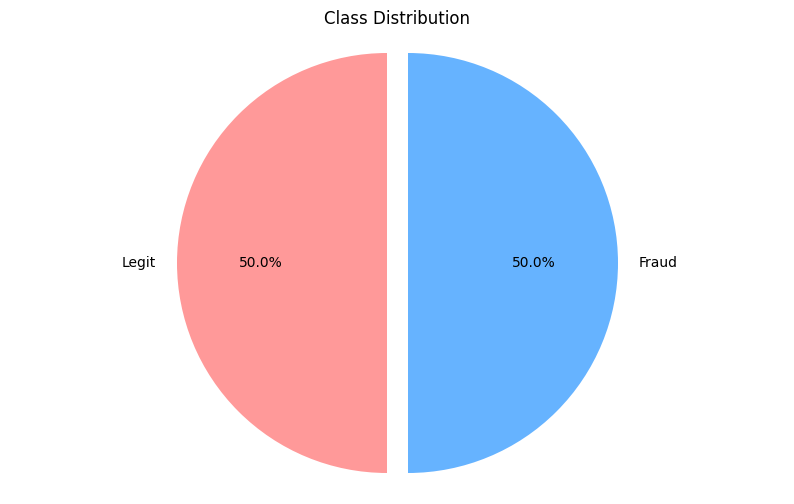

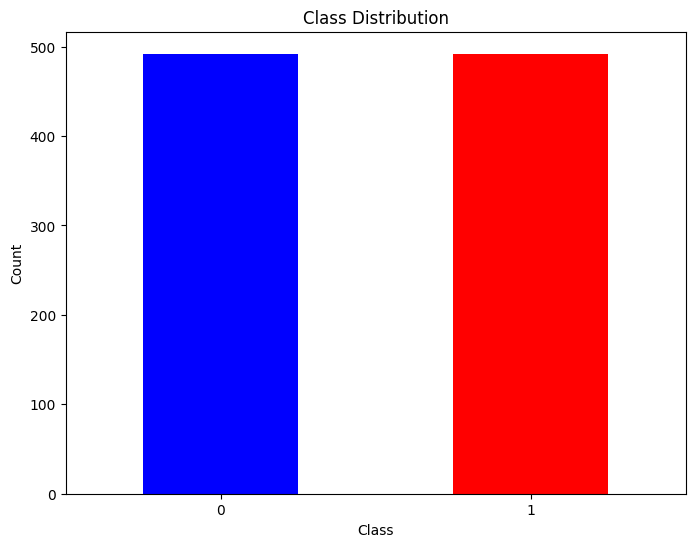

In [ ]:
import matplotlib.pyplot as plt

# Pie chart
labels = ['Legit', 'Fraud']
sizes = new_dataset['Class'].value_counts()
colors = ['#ff9999','#66b3ff']
explode = (0, 0.1)  # explode the 2nd slice (i.e. 'Fraud')

plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Bar graph
plt.figure(figsize=(8, 6))
new_dataset['Class'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels to horizontal
plt.show()


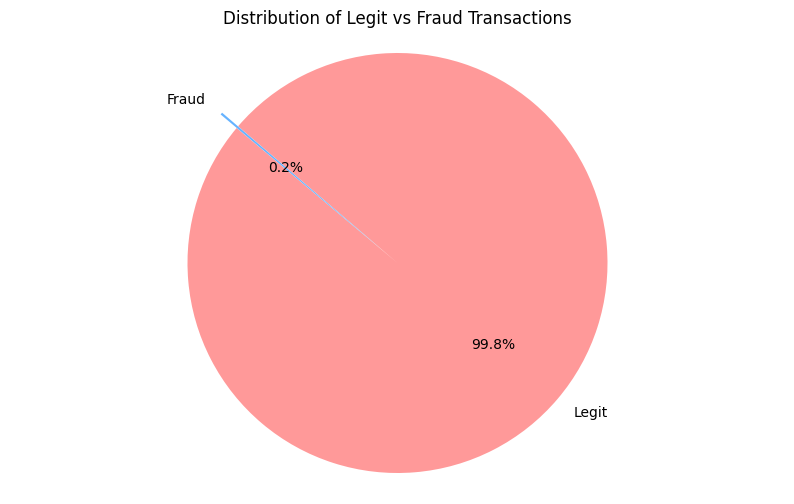

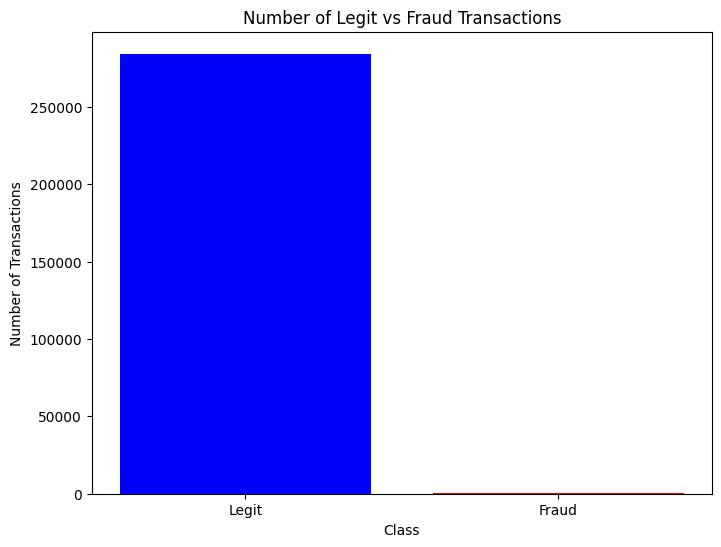

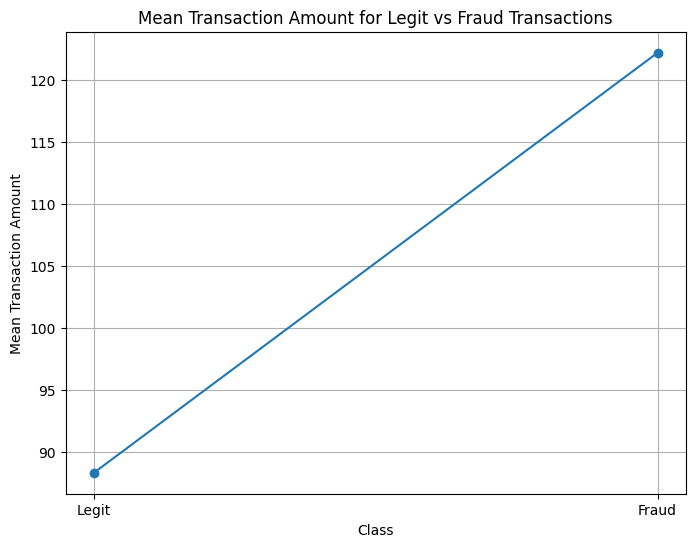

In [ ]:
import matplotlib.pyplot as plt

# Pie chart
labels = ['Legit', 'Fraud']
sizes = [legit.shape[0], fraud.shape[0]]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode 1st slice (to emphasize)

plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Legit vs Fraud Transactions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Bar graph
plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.title('Number of Legit vs Fraud Transactions')
plt.show()

# Line graph
class_mean = credit_card_data.groupby("Class").mean()
plt.figure(figsize=(8, 6))
plt.plot(class_mean.index, class_mean['Amount'], marker='o', linestyle='-')
plt.xlabel('Class')
plt.ylabel('Mean Transaction Amount')
plt.title('Mean Transaction Amount for Legit vs Fraud Transactions')
plt.xticks([0, 1], ['Legit', 'Fraud'])
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
main_df = pd.read_csv('/content/creditcard.csv')
main_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
main_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# dropping time attribute aas of no use and might impact our target variable...
main_df.drop('Time', axis=1, inplace=True)

In [ ]:
X = main_df.drop('Class',axis=1)
Y = main_df['Class']
X.shape,Y.shape

((284807, 29), (284807,))

In [ ]:
temp_df = main_df.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
amount = temp_df['Amount'].values
temp_df['Amount'] = standard.fit_transform(amount.reshape(-1,1))
X_scaled = temp_df.drop('Class',axis=1)
Y_scaled = temp_df['Class']
X_scaled.shape , Y_scaled.shape

((284807, 29), (284807,))

In [ ]:
main_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
import pandas as pd

class_count_df = pd.DataFrame(main_df['Class'].value_counts().rename_axis('Class').reset_index(name='Counts'))
class_count_df['Class'].replace({0:'Legal', 1:'Fraud'}, inplace=True)
class_count_df.head()


,Class,Counts
0,Legal,284315
1,Fraud,492


BAR GRAPH



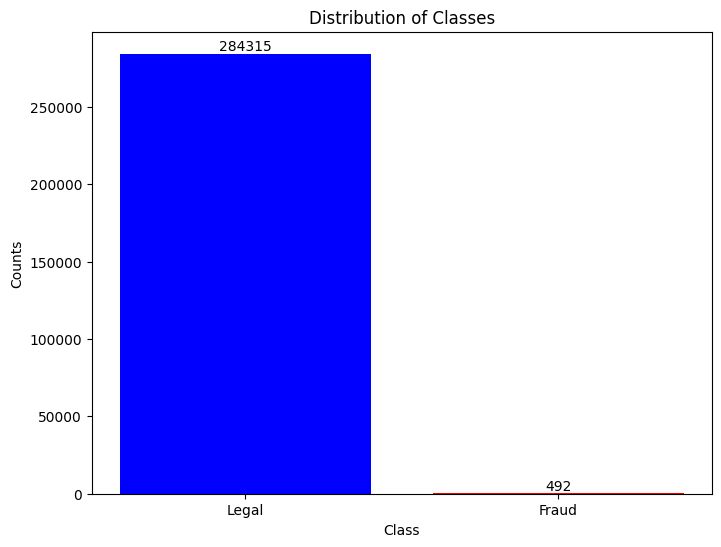

In [ ]:
plt.figure(figsize=(8, 6))
bars = plt.bar(class_count_df['Class'], class_count_df['Counts'], color=['blue', 'red'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Counts')
plt.title('Distribution of Classes')
plt.xticks(class_count_df['Class'], ['Legal', 'Fraud'])
plt.show()

Analysing Before ploting graph.

In [ ]:
fraud = main_df[main_df['Class']==1]
legal = main_df[main_df['Class']==0]
fraud.shape , legal.shape

((492, 30), (284315, 30))

In [ ]:
fraud_frc = len(fraud)/float(len(main_df))
fraud_frc

0.001727485630620034

In [ ]:
print(f"Percentage of fraud transaction in datasets: { fraud_frc*100:.2f}%")

Percentage of fraud transaction in datasets: 0.17%


In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
legal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

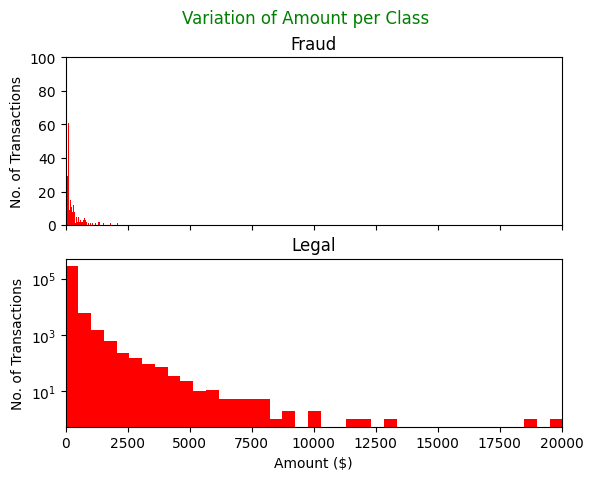

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               sharex=True)
fig.suptitle("Variation of Amount per Class", color='green')
bins=50
ax0.hist(fraud['Amount'], bins=bins, color='red')
ax0.set_title('Fraud')
ax0.set_ylim(0, 100)
ax0.set_ylabel('No. of Transactions')

ax1.hist(legal['Amount'], bins=bins, color='red')
ax1.set_title('Legal')
ax1.set_ylabel('No. of Transactions')

plt.xlim(0, 20000)
plt.xlabel('Amount ($)')
plt.yscale('log')

OVER-SAMPLING

In [ ]:
main_df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
from sklearn.utils import resample
df_majority = main_df[(main_df['Class']==0)]
df_minority = main_df[(main_df['Class']==1)]
df_minority_oversampled = resample(df_minority, replace=True, n_samples=284315, random_state=42)
df_oversampled = pd.concat([df_minority_oversampled, df_majority])
df_oversampled.Class.value_counts()

Class
1    284315
0    284315
Name: count, dtype: int64

In [ ]:
X_oversampled = df_oversampled.drop('Class',axis=1)
Y_oversampled = df_oversampled['Class']
X_oversampled.shape , Y_oversampled.shape

((568630, 29), (568630,))

Under Sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42)

X_undersampled, Y_undersampled = rus.fit_resample(X, Y)
print(f"The number of Classes before the fit {Counter(Y)}")
print(f"The number of Classes after the fit {Counter(Y_undersampled)}")

The number of Classes before the fit Counter({0: 284315, 1: 492})
The number of Classes after the fit Counter({0: 492, 1: 492})


SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Resampling the minority class. The strategy can be changed as required.

sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate the data.

X_smote, Y_smote = sm.fit_resample(main_df.drop('Class', axis=1), main_df['Class'])
smote_df = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(Y_smote)], axis=1)
X_smote.shape

(568630, 29)

In [ ]:
X_smote.shape

(568630, 29)

In [ ]:
smote_df.Class.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

Random Forest

ModuleNotFoundError: No module named 'import_ipynb'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


In [ ]:
def RF_model(X,Y):
    print("Spliting Datasets....")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2)
    print("Successfully splitted!!!")

    print("Model Fitting.....")
    rf = RandomForestClassifier()
    rf.fit(X_train, Y_train)
    print("Successfully model fitted!!!")

    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    print("------------Training Prediction--------------")
    Y_preds = rf.predict(X_train)
    print(f"Classfifcation Report:\n\n{classification_report(Y_train, Y_preds)}\n\n")

    cf_matrix = confusion_matrix(Y_train, Y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix of Training Datasets",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(Y_train, Y_preds)*100:2f}%\n")

    print("------------Test Prediction--------------")

    Y_preds = rf.predict(X_test)
    print(f"Classfifcation Report:\n\n{classification_report(Y_test, Y_preds)}\n\n")

    cf_matrix = confusion_matrix(Y_test, Y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix of Testing Datasets",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(Y_test, Y_preds)*100:2f}%\n")

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



Accuracy Score:

99.957867%



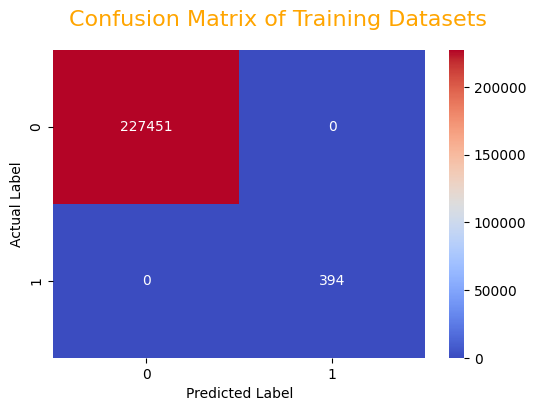

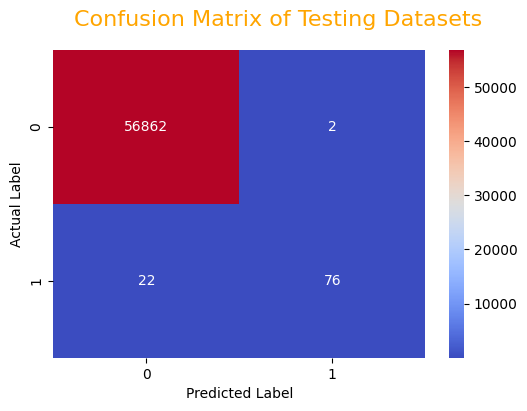

In [ ]:
RF_model(X,Y)

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



Accuracy Score:

99.957867%



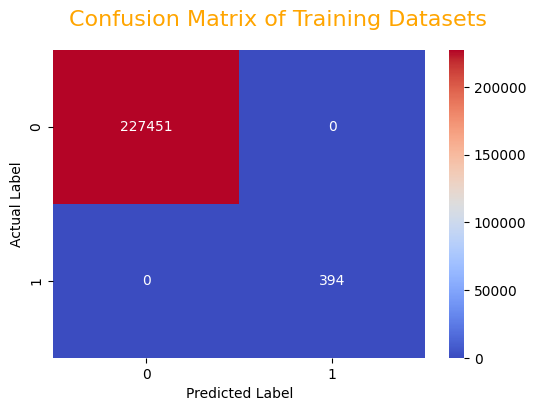

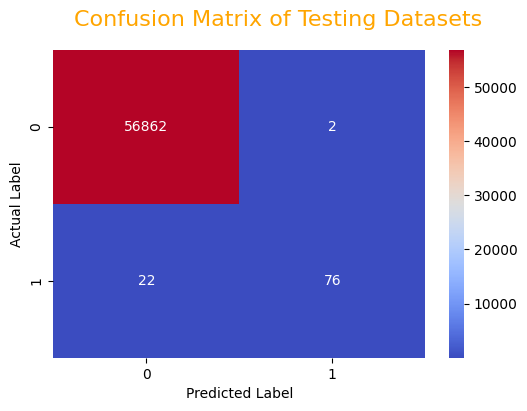

In [ ]:
RF_model(X_scaled,Y_scaled)

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       394

    accuracy                           1.00       787
   macro avg       1.00      1.00      1.00       787
weighted avg       1.00      1.00      1.00       787



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.96      0.89      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



Accuracy Score:

92.385787%



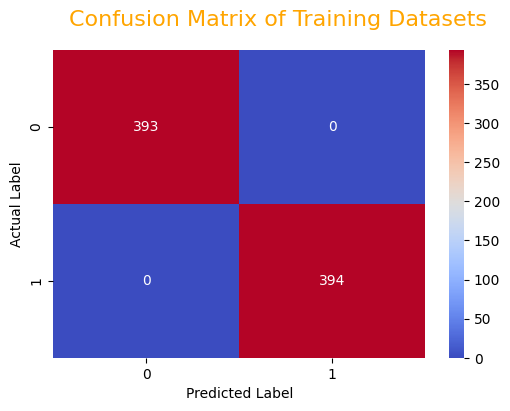

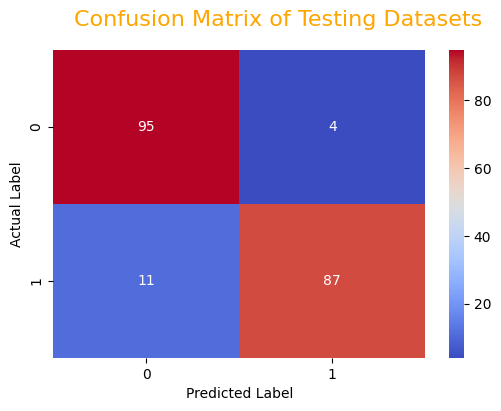

In [ ]:
RF_model(X_undersampled,Y_undersampled)

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227335
           1       1.00      1.00      1.00    227569

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56980
           1       1.00      1.00      1.00     56746

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



Accuracy Score:

99.996483%



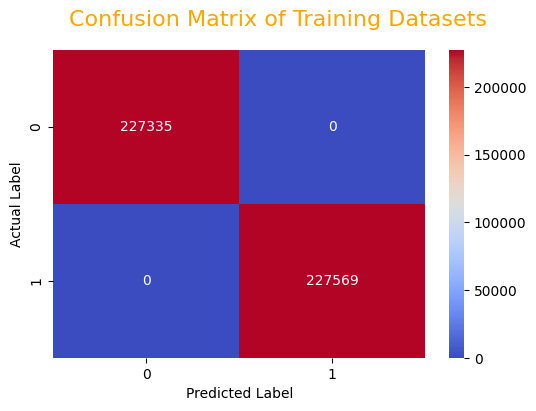

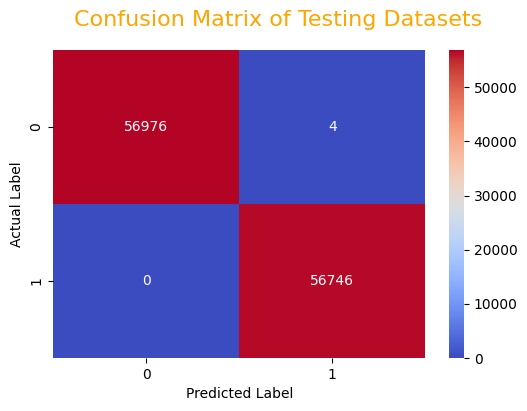

In [ ]:
RF_model(X_oversampled,Y_oversampled)

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227565
           1       1.00      1.00      1.00    227339

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



Accuracy Score:

99.990328%



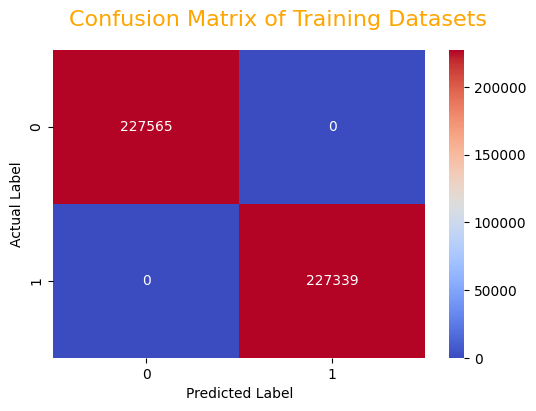

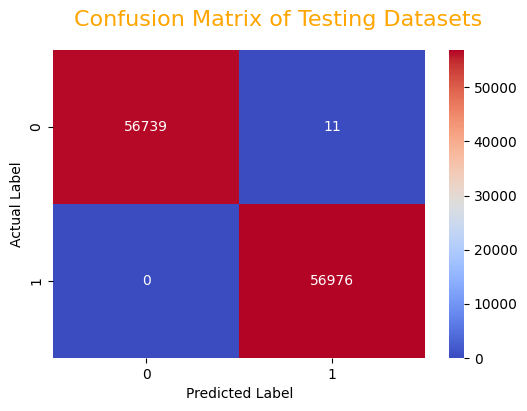

In [ ]:
RF_model(X_smote,Y_smote)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X_oversampled, Y_oversampled, test_size=0.2, random_state=42)

RF_model = RandomForestClassifier(n_estimators=100, random_state=42)

RF_model.fit(X_train, Y_train)

Y_pred = RF_model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)

accuracy_percentage = accuracy * 100
print("Accuracy:", accuracy_percentage, "%")


NameError: name 'X_oversampled' is not defined

Decision Tree

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
def DT_model(X, y):
    print("Splitting Datasets....")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
    print("Successfully split!!!")

    print("Model Fitting.....")
    dt = DecisionTreeClassifier()
    dt.fit(X_train, Y_train)
    print("Successfully model fitted!!!")

    print("------------Training Prediction--------------")
    Y_preds = dt.predict(X_train)
    print(f"Classification Report:\n\n{classification_report(Y_train, Y_preds)}\n\n")

    cf_matrix = confusion_matrix(Y_train, Y_preds)

    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix", color="orange", fontsize=16)
    ax.set(xlabel="Predicted Label", ylabel="Actual Label")

    print(f"Accuracy Score:\n\n{accuracy_score(Y_train, Y_preds) * 100:.2f}%\n")

    print("------------Test Prediction--------------")

    Y_preds = dt.predict(X_test)
    print(f"Classification Report:\n\n{classification_report(Y_test, Y_preds)}\n\n")

    cf_matrix = confusion_matrix(Y_test, Y_preds)
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix", color="orange", fontsize=16)
    ax.set(xlabel="Predicted Label", ylabel="Actual Label")

    print(f"Accuracy Score:\n\n{accuracy_score(Y_test, Y_preds) * 100:.2f}%\n")


In [ ]:
DT_model(X, Y)

Splitting Datasets....
Successfully split!!!
Model Fitting.....


ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
DT_model(X_scaled,Y_scaled)

In [ ]:
DT_model(X_undersampled, Y_undersampled)

In [ ]:
DT_model(X_oversampled, Y_oversampled)